Image credits: [Figure 18.3](https://allmodelsarewrong.github.io/lasso.html#fig:unnamed-chunk-3), Sanchez, G., Marzban, E. (2020) **All Models Are Wrong: Concepts of Statistical Learning.**

Python source: [451-blog/linreg.py at main · doabell/451-blog](https://github.com/doabell/451-blog/blob/main/posts/linear-regression/linreg.py)

Instructions can be found at [Implementing Linear Regression](https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-linear-regression.html).

## Algorithm Demo

We implement linear regression in two methods:

1. Using the [analytical formula](https://middlebury-csci-0451.github.io/CSCI-0451/lecture-notes/regression.html#eq-least-squares) for the optimal weight vector
2. Using gradient descent on the [gradient formula](https://middlebury-csci-0451.github.io/CSCI-0451/lecture-notes/regression.html#eq-gradient)

### Data

In [1]:
# Data
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import font_manager
font_manager.fontManager.addfont("C:\Windows\Fonts\FiraSans-Regular.ttf")
plt.rcParams["font.family"] = "Fira Sans"

np.random.seed(283)


def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)


def LR_data(n_train=100, n_val=100, p_features=1, noise=.1, w=None):
    if w is None:
        w = np.random.rand(p_features + 1) + .2

    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)

    return X_train, y_train, X_val, y_val


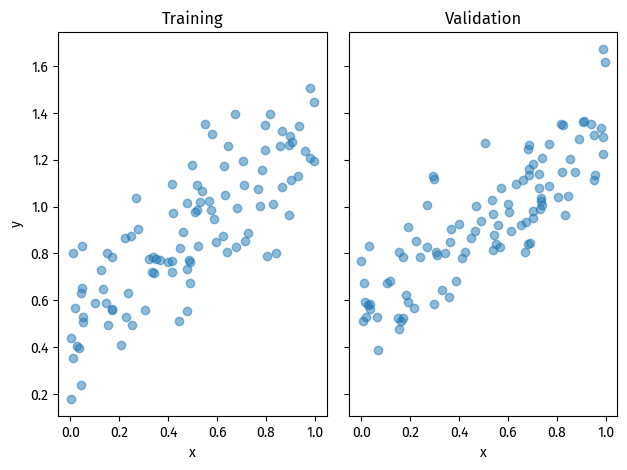

In [2]:
# Visualize
n_train = 100
n_val = 100
p_features = 1
noise = 0.16

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex=True, sharey=True)
axarr[0].scatter(X_train, y_train, alpha=0.5)
axarr[1].scatter(X_val, y_val, alpha=0.5)
labs = axarr[0].set(title="Training", xlabel="x", ylabel="y")
labs = axarr[1].set(title="Validation", xlabel="x")
plt.tight_layout()


### Analytical
We call `LR.fit()`, which defaults to using the analytical formula:

Training score = 0.7162
Validation score = 0.7064


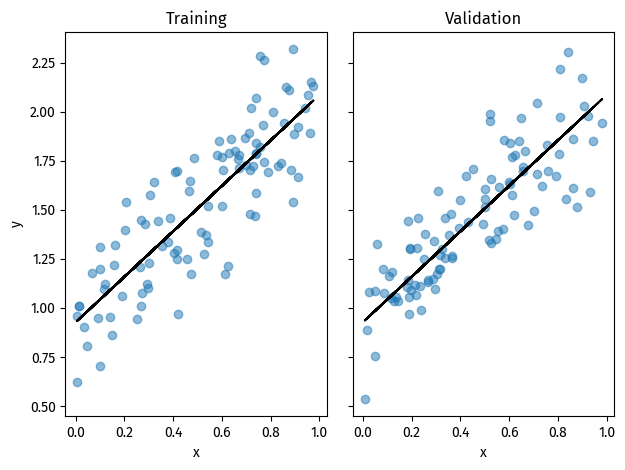

In [6]:
# Train model
from linreg import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

fig, axarr = plt.subplots(1, 2, sharex=True, sharey=True)
axarr[0].scatter(X_train, y_train, alpha=0.5)
axarr[0].plot(X_train, pad(X_train)@LR.w, color="black")
axarr[1].scatter(X_val, y_val, alpha=0.5)
axarr[1].plot(X_val, pad(X_val)@LR.w, color="black")
labs = axarr[0].set(title="Training", xlabel="x", ylabel="y")
labs = axarr[1].set(title="Validation", xlabel="x")
plt.tight_layout()

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")


Our validation score is similar to the training score.

Visually, the resulting line looks like a good fit for the data.

We can then check our estimated weight vector:

In [210]:
# Estimated weight vector
LR.w


array([0.80273893, 0.49734664])

### Gradient descent
We call linear regression with `method="gradient"`:

In [211]:
# Using gradient descent
LR2 = LinearRegression()

LR2.fit(X_train, y_train, method="gradient", alpha=0.001, max_iter=100)
print(f"Training score = {LR2.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR2.score(X_val, y_val).round(4)}")


Training score = 0.6433
Validation score = 0.6966


The scores are similar to that of the analytical method.

We can check how the training score evolved with each iteration:

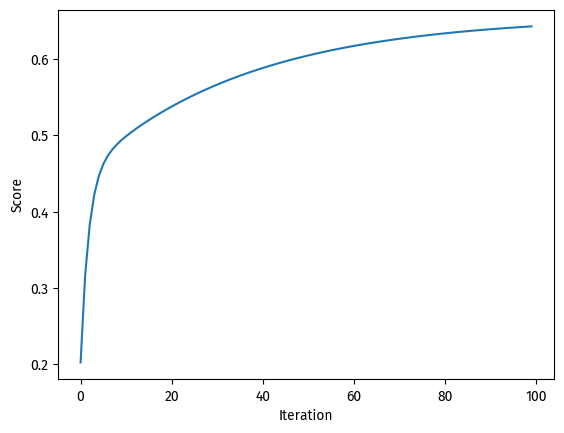

In [212]:
# score history
plt.plot(LR2.score_history)
labels = plt.gca().set(xlabel="Iteration", ylabel="Score")


We observe that the score improved quickly to around 0.6, and then improved more slowly.

Finally, we can plot the resulting regression lines:

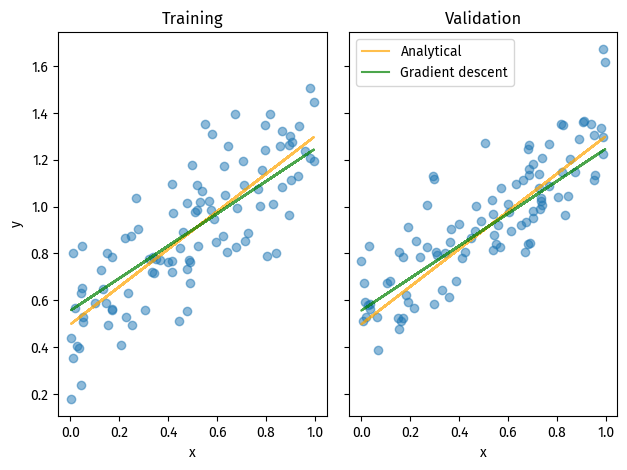

In [213]:
fig, axarr = plt.subplots(1, 2, sharex=True, sharey=True)
axarr[0].scatter(X_train, y_train, alpha=0.5)
axarr[0].plot(
    X_train, pad(X_train)@LR.w,
    label="Analytical", alpha=0.7, color="orange"
)
axarr[0].plot(
    X_train, pad(X_train)@LR2.w,
    label="Gradient descent", alpha=0.7, color="green"
)
axarr[1].scatter(X_val, y_val, alpha=0.5)
axarr[1].plot(
    X_val, pad(X_val)@LR.w,
    label="Analytical", alpha=0.7, color="orange"
)
axarr[1].plot(
    X_val, pad(X_val)@LR2.w,
    label="Gradient descent", alpha=0.7, color="green"
)
labs = axarr[0].set(title="Training", xlabel="x", ylabel="y")
labs = axarr[1].set(title="Validation", xlabel="x")
plt.tight_layout()
legend = plt.legend()


Although the two lines are slightly different, they are both close enough visually.

## Experiments
We now experiment with the number of features used in our linear regression model.

More features *may* lead to better scores, but might also make the model overfit.

### Analytical
First, we make some data with 1 to 99 features.
Then, we can fit our analytical linear regression on the data as follows:

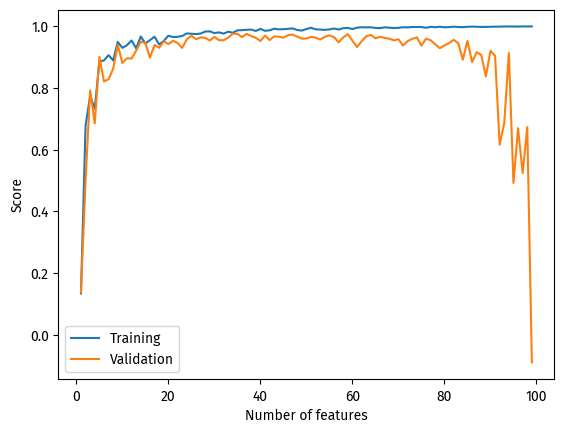

In [37]:
scores_train_ana = []
scores_val_ana = []

n_train = 100
n_val = 100
noise = 0.2

for p_features in range(1, n_train):
    X_train, y_train, X_val, y_val = LR_data(
        n_train, n_val, p_features, noise
    )
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    scores_train_ana.append(LR.score(X_train, y_train))
    scores_val_ana.append(LR.score(X_val, y_val))

# https://stackoverflow.com/a/67037892
plt.plot(range(1, len(scores_train_ana) + 1),
         scores_train_ana, label="Training")
plt.plot(range(1, len(scores_val_ana) + 1), scores_val_ana, label="Validation")
labels = plt.gca().set(xlabel="Number of features", ylabel="Score")
legend = plt.legend()


As we increase the number of features to fit on, the training accuracy increases because more features are available.
The improvements beyond 20 features is very small though.

The validation score, however, decrease as we fit over more features.
It even drops below 0 when the number of features gets close to 100 (the number of training and validation data points)!

Here, we can see overfitting going on.
Especially in the case of fitting over 80 features on 100 data points, in the worst-case scenario, each data point can have a fairly distinct set of feature combinations, leading to overfitting.
This is despite our data being generated with an underlying distribution (as seen in `LR_data()`).

### Gradient descent
We can repeat the same experiment, but for gradient descent.

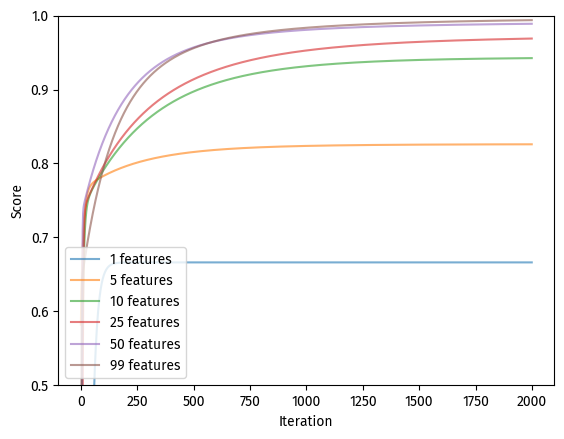

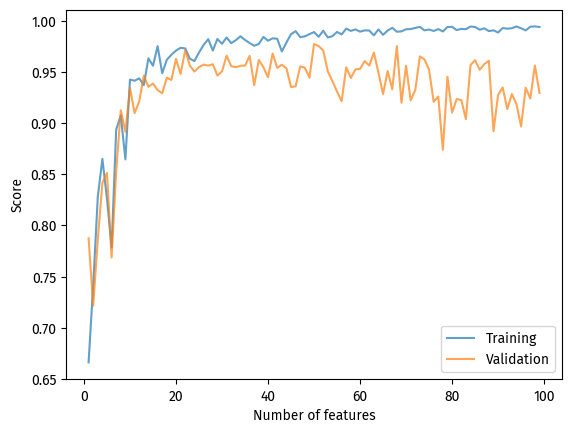

In [225]:
scores_train_gra = []
scores_val_gra = []

n_train = 100
n_val = 100
noise = 0.2

plt.figure(1)
for p_features in range(1, n_train):
    X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
    LR = LinearRegression()
    LR.fit(X_train, y_train, method="gradient", alpha=0.0001, max_iter=2000)
    scores_train_gra.append(LR.score(X_train, y_train))
    scores_val_gra.append(LR.score(X_val, y_val))
    # plot score over history
    if p_features in [1, 5, 10, 25, 50, 99]:
        plt.plot(
            LR.score_history,
            label=f"{p_features} features",
            alpha=0.6
        )
labels = plt.gca().set(xlabel="Iteration", ylabel="Score")
legend = plt.legend()
plt.ylim(bottom=0.5, top=1)

# plot score over features
plt.figure(2)
plt.plot(
    range(1, len(scores_train_gra) + 1),
    scores_train_gra, label="Training", alpha=0.7
)
plt.plot(
    range(1, len(scores_val_gra) + 1),
    scores_val_gra, label="Validation", alpha=0.7
)
labels = plt.gca().set(xlabel="Number of features", ylabel="Score")
legend = plt.legend()


For score based on the number of features, we observe a similar trend from using the analytical formula.
There is not much improvement beyond 20 features, and the validation score fluctuates a lot with a higher number of features.

Also of interest is how the training score changes over each iteration, with different number of features:

- When there is only 1 feature, our training score does not get higher than 0.7.
- The more features, we use, the higher training score we get (as illustrated by the second plot)
- However, when only using 10 features, we already achieve a training score higher than 0.9.
- Higher number of features yield smaller improvements.

This behavior is consistent with overfitting, where the training score can get really close to 1, but the validation score fluctuates.

### LASSO Regularization
One way to deal with this sort of overfitting, or indeed the presence of too many features, is to use a feature selection algorithm.

Here, we use LASSO regularization implemented in the `scikit-learn` package.
LASSO has a tendency to give zero weights to features, making for feature selection.

LASSO has [a hyperparameter](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), `alpha`, that controls the strength of regularization.
This can be anywhere in `[0, inf)`.

We repeat the above experiment to see how LASSO regularization can guard against overfitting.

In [94]:
from sklearn.linear_model import Lasso

scores_train_las = []
scores_val_las = []

n_train = 100
n_val = 100
noise = 0.2

for p_features in range(1, n_train):
    X_train, y_train, X_val, y_val = LR_data(
        n_train, n_val, p_features, noise
    )
    L = Lasso(alpha=0.001)
    L.fit(X_train, y_train)
    scores_train_las.append(L.score(X_train, y_train))
    scores_val_las.append(L.score(X_val, y_val))


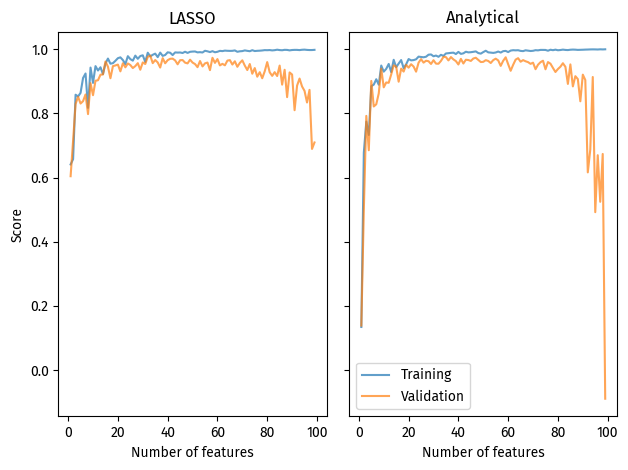

In [95]:
# Plot
fig, axarr = plt.subplots(1, 2, sharex=True, sharey=True)
axarr[0].plot(
    range(1, len(scores_train_las) + 1), scores_train_las,
    label="Training", alpha=0.7
)
axarr[0].plot(
    range(1, len(scores_val_las) + 1), scores_val_las,
    label="Validation", alpha=0.7
)
axarr[1].plot(
    range(1, len(scores_train_ana) + 1), scores_train_ana,
    label="Training", alpha=0.7
)
axarr[1].plot(
    range(1, len(scores_val_ana) + 1), scores_val_ana,
    label="Validation", alpha=0.7
)
labs = axarr[0].set(title="LASSO", xlabel="Number of features", ylabel="Score")
labs = axarr[1].set(title="Analytical", xlabel="Number of features")
plt.tight_layout()
legend = plt.legend()


With a large number of features, LASSO was successful in reducing the training-validation gap that indicates overfitting.

That said, the validation score still drops noticably for over 80 features.
Thus, for overparameterized problems like this where the number of features is close to (or greater than!) the number of data points, it is still more advisable to:

- fit with less features, or
- reduce the severity of overparameterization

Additionally, LASSO also performs better with few (around 1-5) features, but this is subject to randomness (like gradient descent).

## Data: Bike Sharing
Next, we can test the real-life performance of linear regression, with the analytical formula or with gradient descent.

We will be using [this bike-sharing dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset), from Washington DC[^1], to predict the number of casual bikeshare users given info on that day.

[^1]: Fanaee-T, H., Gama, J. Event labeling combining ensemble detectors and background knowledge. *Prog Artif Intell* **2**, 113–127 (2014). <https://doi.org/10.1007/s13748-013-0040-3>

(The setup code below is adapted from [the blog post instructions](https://middlebury-csci-0451.github.io/CSCI-0451/assignments/blog-posts/blog-post-linear-regression.html#optional-bikeshare-data-set).)

In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split
bikeshare = pd.read_csv(
    "https://philchodrow.github.io/PIC16A/datasets/Bike-Sharing-Dataset/day.csv")

cols = ["casual",
        "mnth",
        "weathersit",
        "workingday",
        "yr",
        "temp",
        "hum",
        "windspeed",
        "holiday",
        "dteday"]

bikeshare_plot = bikeshare[cols]
bikeshare_plot = pd.get_dummies(bikeshare_plot, columns=[
                                'mnth'], drop_first="if_binary")

train, test = train_test_split(bikeshare_plot, test_size=.2, shuffle=False)

X_train = train.drop(["casual", "dteday"], axis=1)
y_train = train["casual"]

X_test = test.drop(["casual", "dteday"], axis=1)
y_test = test["casual"]

X_train.head()


,weathersit,workingday,yr,temp,hum,windspeed,holiday,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,2,0,0,0.344167,0.805833,0.160446,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0.363478,0.696087,0.248539,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0.196364,0.437273,0.248309,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0.200000,0.590435,0.160296,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0.226957,0.436957,0.186900,0,0,0,0,0,0,0,0,0,0,0,0


In [166]:
X_train.shape


(584, 18)

### Analytical
We first use the analytical method, inspecting the scores and weight vectors:

In [162]:
LR4 = LinearRegression()
LR4.fit(X_train, y_train)

print(f"Training score = {LR4.score(X_train, y_train).round(6)}")
print(f"Test score = {LR4.score(X_test, y_test).round(6)}")


Training score = 0.731836
Test score = 0.696773


In [180]:
pd.Series(LR4.w[:-1], index=X_train.columns).sort_values()


windspeed    -1242.800381
workingday    -791.690549
hum           -490.100340
holiday       -235.879349
weathersit    -108.371136
mnth_2          -3.354397
mnth_12         90.821460
mnth_7         228.881481
mnth_8         241.316412
mnth_11        252.433004
yr             280.586927
mnth_6         360.807998
mnth_3         369.271956
mnth_9         371.503854
mnth_10        437.600848
mnth_4         518.408753
mnth_5         537.301886
temp          1498.715113
dtype: float64

### Gradient Descent
Then, we repeat the same process with gradient descent.

In [164]:
LR5 = LinearRegression()
LR5.fit(X_train, y_train, method="gradient", alpha=0.0001, max_iter=10000)

print(f"Training score = {LR5.score(X_train, y_train).round(6)}")
print(f"Test score = {LR5.score(X_test, y_test).round(6)}")


Training score = 0.731833
Test score = 0.696753


In [179]:
pd.Series(LR5.w[:-1], index=X_train.columns).sort_values()


windspeed    -1230.491728
workingday    -791.472877
hum           -484.647522
holiday       -235.399837
weathersit    -109.260413
mnth_2          -1.748008
mnth_12         93.293066
mnth_7         235.754820
mnth_8         247.603486
mnth_11        255.436488
yr             281.231420
mnth_6         366.826944
mnth_3         371.749383
mnth_9         376.868083
mnth_10        441.334934
mnth_4         521.567646
mnth_5         541.885682
temp          1488.043873
dtype: float64

We achieved nearly identical results with the two methods.

Since we have reasonable numbers of data points (584) and features (18), we do expect that the analytical and gradient descent methods to arrive at a similarly good goal.

### LASSO Regularization

In [176]:
L2 = Lasso(alpha=0.05)
L2.fit(X_train, y_train)
print(f"Training score = {L2.score(X_train, y_train).round(6)}")
print(f"Test score = {L2.score(X_test, y_test).round(6)}")


Training score = 0.731824
Test score = 0.696659


In [178]:
pd.Series(L2.coef_, index=X_train.columns).sort_values()


windspeed    -1233.278124
workingday    -791.462521
hum           -484.813541
holiday       -234.619924
weathersit    -108.888907
mnth_2          -8.285024
mnth_12         83.321973
mnth_7         214.900960
mnth_8         226.955076
mnth_11        243.204653
yr             279.195051
mnth_6         348.087677
mnth_9         358.328354
mnth_3         361.587089
mnth_10        427.148731
mnth_4         509.108560
mnth_5         525.695908
temp          1516.891474
dtype: float64

Yet again, we arrive at similar results.
This indicates that there is no overparameterization in this dataset, like the previous experiment.

### Feature weights
So what do these numbers actually mean?
Features with positive numbers contribute to (casual) ridership; features with negative numbers, surprisingly, also contribute to ridership, but negatively.

Reading off the individual labels:

- The higher the average temperature, the more bike riders.
  This metric might be more helpful if we classified temperatures as "too cold", "too hot", and "great for biking".
- People biked more in March, April, May, and September.
  This might also have to do with the temperature, or nice weather in general.
- People biked less if it is a `workingday`, and biked more at weekends.
- People biked less if there is a strong wind.

### Predictions
We first plot out the original, complete data for reference:

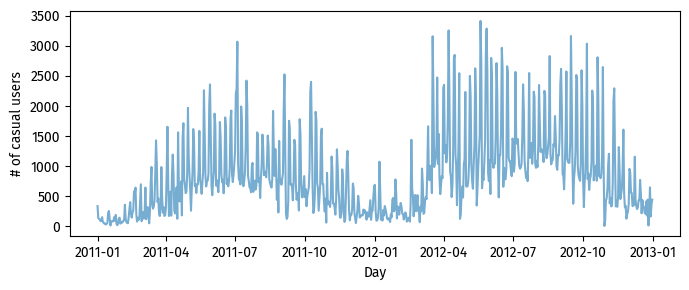

In [196]:
fig, ax = plt.subplots(1, figsize=(7, 3))
ax.plot(
    pd.to_datetime(bikeshare['dteday']),
    bikeshare['casual'], alpha=0.6
)
ax.set(xlabel="Day", ylabel="# of casual users")
l = plt.tight_layout()


This is important because the next plot is of the test set, and is therefore **not continuous** in dates.

Next, we can plot our predictions against the actual riderships.
Here, `LR5`, our linear regression model with gradient descent, is used as the predictor.

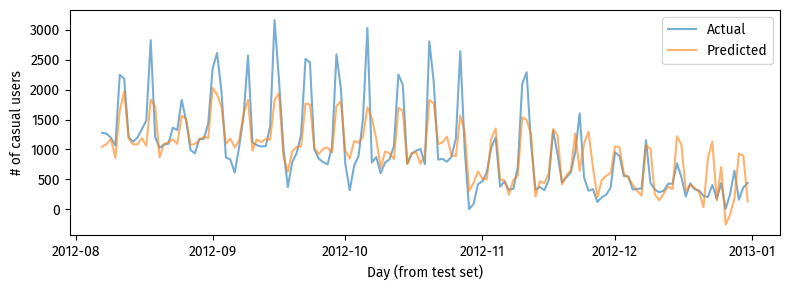

In [194]:
# import datetime
fig, ax = plt.subplots(1, figsize=(8, 3))
ax.plot(
    pd.to_datetime(test['dteday']),
    test['casual'],
    label="Actual",
    alpha=0.6
)
ax.plot(
    pd.to_datetime(test['dteday']),
    LR5.predict(X_test),
    label="Predicted",
    alpha=0.6
)
ax.set(xlabel="Day (from test set)", ylabel="# of casual users")
plt.tight_layout()
legend = plt.legend()


We observe that the predicted ridership is much smoother than the actual riderships.

This may be due to our features not capturing enough real-life conditions, and / or due to the original data varying a lot day by day.

However, our model was able to predict the "shape" of casual ridership changes, so the general direction of things is there.